In [2]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import torchvision
from datetime import datetime
import numpy as np

now = datetime.now()

In [6]:
import matplotlib.pyplot as plt

In [4]:
class Generator(nn.Module):
    def __init__(self,z_dim,channels_img,input_features):
        super(Generator,self).__init__()
        self.net = nn.Sequential(   
            self._block(z_dim,input_features*16,4,1,0),
            self._block(input_features*16,input_features*8,4,2,1),
            self._block(input_features*8,input_features*4,4,2,1),
            self._block(input_features*4,input_features*2,4,2,1),
            nn.ConvTranspose2d(
                input_features*2,channels_img,kernel_size=4,stride=2,padding=1
            ),
            nn.Tanh()

        )   
    def _block(self,in_channels,out_channels,kernalsize,stride,padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernalsize,
                stride,
                padding,
                bias=False
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
    def forward(self,x):
        return self.net(x)
        

torch.Size([16, 3, 64, 64])


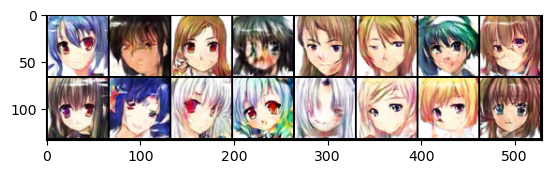

In [19]:
DEVICE="cuda" if torch.cuda.is_available() else "cpu"
z_dim=100
NUMBER_OF_IMAGES=16
gen=torch.load('./models/gen.pt').to(DEVICE)


fixed_noise=torch.randn(NUMBER_OF_IMAGES,z_dim,1,1).to(DEVICE)

with torch.no_grad():
    fake = gen(fixed_noise)
    print(fake.shape)
    img_grid_fake=torchvision.utils.make_grid(fake[:],normalize=True)
    plt.imshow(img_grid_fake.cpu().permute(1, 2, 0))


